In [45]:
import numpy as np
import matplotlib.pyplot as plt
import STOM_higgs_tools
from tqdm.notebook import tqdm
from mpl_toolkits.mplot3d import Axes3D


Finding Values

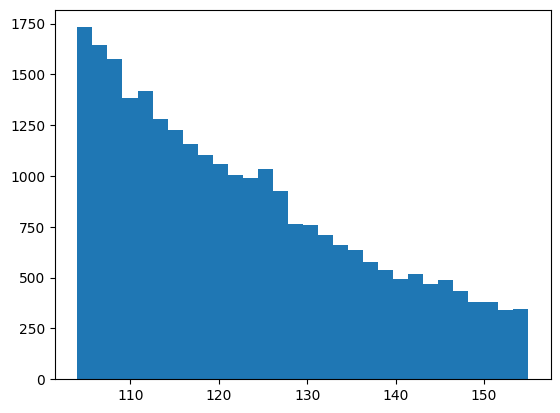

In [46]:

vals = STOM_higgs_tools.generate_data()
nbins=30
mass_range=[104,155]
bin_heights, bin_edges, patches = plt.hist(vals, range = mass_range, bins = nbins)
plt.show() 

$\chi^2$ Minimisation

Create a range of A and lambda values. For each value of A (`A[i]`), cycle through every lambda value (`lamb[j]`), and calculate the chi-squared values. Check if chi-squared value is less than previous chi-squared values, if so, set these values of A and lambda as the optimum. 

Note that we only use the range `[104,120]` because we need to ignore the higgs boson bump. 

In [33]:
# code for small range, lower bins without signal. (background)
nbins = 9
L=40#number of A and lambda values to check
A=np.linspace(5e4,10e4,L) #range of predicted A values
lamb =np.linspace(25,35,L) #range of predicted lambda values
pbar = tqdm(range(L**2))
chi_list=[1e6] #placeholder
mass_range_low=[104,120]
for i in range(L):
    for j in range(L):
        chi=STOM_higgs_tools.get_B_chi(vals,mass_range_low,nbins,A[i],lamb[j])
        if chi < np.min(chi_list):
            chi_min=chi
            lamb_opt=lamb[j]
            A_opt=A[i]
        chi_list=np.append(chi_list,chi)
        pbar.update(1)
print(f'lambda = {lamb_opt}, A = {A_opt}, minimum chi={chi_min}')

  0%|          | 0/1600 [00:00<?, ?it/s]

lambda = 29.358974358974358, A = 65384.61538461538, minimum chi=0.722258042465403


full range

In [ ]:
L=40#number of A and lambda values to check
A=np.linspace(5e4,10e4,L) #range of predicted A values
lamb =np.linspace(25,35,L) #range of predicted lambda values
pbar = tqdm(range(L**2))
chi_list=[1e6] #placeholder
mass_range_low=[104,155]
for i in range(L):
    for j in range(L):
        chi=STOM_higgs_tools.get_B_chi(vals,mass_range_low,nbins,A[i],lamb[j])
        if chi < np.min(chi_list):
            chi_min=chi
            lamb_opt=lamb[j]
            A_opt=A[i]
        chi_list=np.append(chi_list,chi)
        pbar.update(1)
print(f'lambda = {lamb_opt}, A = {A_opt}, minimum chi={chi_min}')

Find fit using optimised parameters:

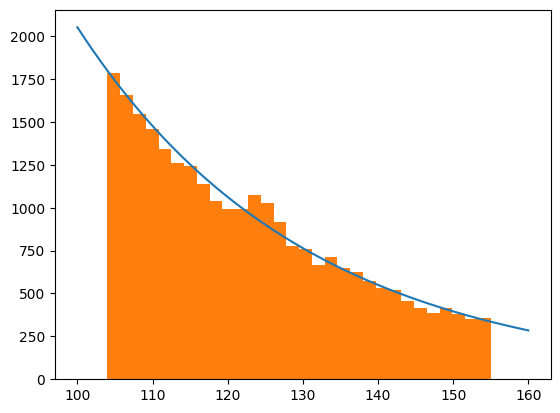

In [9]:
x=np.linspace(100,160,10000)
y=STOM_higgs_tools.get_B_expectation(x,A_opt,lamb_opt)
plt.plot(x,y)
bin_heights, bin_edges, patches = plt.hist(vals, range = mass_range, bins = nbins)
plt.show() 

Chi-squared value for the *entire* range. Should be less than degrees of freedom `nbins-2`

In [5]:
chi_total = STOM_higgs_tools.get_B_chi(vals,[104,155],30,A_opt,lamb_opt)
print(chi_total)

944.6566227244231


TypeError: Input z must be 2D, not 3D

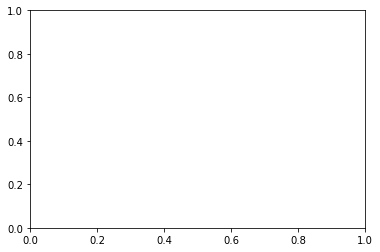

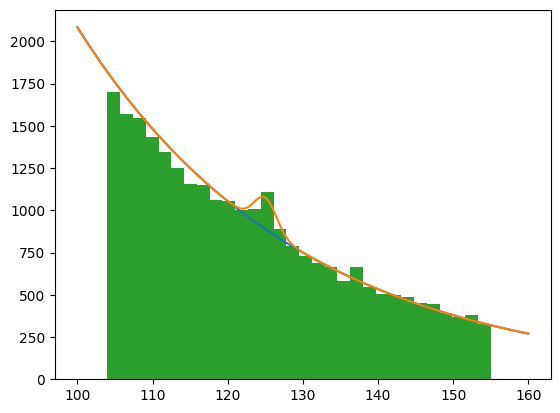

In [24]:
y_data = STOM_higgs_tools.get_SB_expectation(x,A_opt,lamb_opt,125, 1.5,700)
x=np.linspace(100,160,10000)
y=STOM_higgs_tools.get_B_expectation(x,A_opt,lamb_opt)
plt.plot(x,y)
plt.plot(x, y_data)
bin_heights, bin_edges, patches = plt.hist(vals, range = mass_range, bins = 30)
plt.show()


In [54]:
bin_heights, bin_edges = np.histogram(vals, range = mass_range, bins = nbins)
half_bin_width = 0.5*(bin_edges[1] - bin_edges[0])
ys_expected = STOM_higgs_tools.get_B_expectation(bin_edges + half_bin_width, A_opt, lamb_opt) + STOM_higgs_tools.signal_gaus(bin_edges + half_bin_width, 125, 1.5, 700)
chi = 0

# Loop over bins - all of them for now. 
for i in range( len(bin_heights) ):
    chi_nominator = (bin_heights[i] - ys_expected[i])**2
    chi_denominator = ys_expected[i]
    chi += chi_nominator / chi_denominator

chi = chi/float(nbins-2) # B has 2 parameters.
print('chi is :',chi)

chi is : 3.1422917209728234
